In [14]:
import tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model

In [2]:
data_set = tf.keras.datasets.fashion_mnist

In [3]:
(train_data,train_label) , (test_data , test_label) = data_set.load_data()

In [4]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self , epochs , logs = {}):
        if(logs.get('acc') is not None and log.get('acc')>=0.99):
            print("\n stopping because desired accuracy is acheived \n")
            self.model.stop_training = True

In [5]:
callback = MyCallback()

In [6]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
train_data = train_data.reshape(60000 , 28 , 28 , 1)
test_data = test_data.reshape(10000 , 28 , 28 , 1)

In [8]:
train_data = train_data/255.0
test_data = test_data/255.0

In [9]:
model = keras.models.Sequential([keras.layers.Conv2D( 64 , (3,3)  ,activation = 'relu' ,  input_shape = (28 , 28 , 1)) , 
                         keras.layers.MaxPooling2D(2,2)  , 
                         keras.layers.Conv2D( 64 , (3,3) , activation = 'relu' ) ,
                         keras.layers.MaxPooling2D(2,2) ,
                         keras.layers.Flatten() , 
                         keras.layers.Dense(units = 128 , activation = 'relu') ,
                         keras.layers.Dense(units = 10 , activation = 'softmax')] )

In [10]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [11]:
model.fit(train_data , train_label , epochs = 5 , callbacks = [callback])

Epoch 1/5
1875/1875 [==============================] - 255s 134ms/step - loss: 0.6058 - accuracy: 0.7819
Epoch 2/5
1875/1875 [==============================] - 225s 120ms/step - loss: 0.3013 - accuracy: 0.8903
Epoch 3/5
1875/1875 [==============================] - 217s 116ms/step - loss: 0.2539 - accuracy: 0.9069
Epoch 4/5
1875/1875 [==============================] - 226s 121ms/step - loss: 0.2165 - accuracy: 0.9195
Epoch 5/5
1875/1875 [==============================] - 256s 137ms/step - loss: 0.1880 - accuracy: 0.9294


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [18]:
for layer in model.layers:
    print(layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 26, 26, 64), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13, 13, 64), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 11, 11, 64), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 64), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created by layer 'max_pooling2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1600), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=t

In [13]:
### visualisation of inner convolution layers output 

In [19]:
print(test_label[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


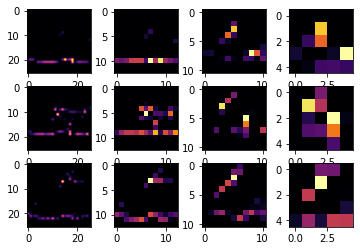

In [40]:
fig ,arr= plt.subplots(3,4)      ### this returns one instance of figure and array axes

first_image = 0
second_image = 23
last_image = 28
CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in model.layers]  ### lists the outputs of layers
activation_model = Model(inputs = model.input , outputs = layer_outputs)   ### this creater list of all layers with input and output
for x in range(0,4):
    f1 = activation_model.predict(test_data[first_image].reshape(1, 28, 28, 1))[x]
    arr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    arr[0,x].grid(False)
    f2 = activation_model.predict(test_data[second_image].reshape(1, 28, 28, 1))[x]
    arr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    arr[1,x].grid(False)
    f3 = activation_model.predict(test_data[last_image].reshape(1, 28, 28, 1))[x]
    arr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    arr[2,x].grid(False)
    

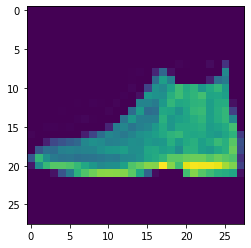

In [44]:
plt.imshow(test_data[first_image])


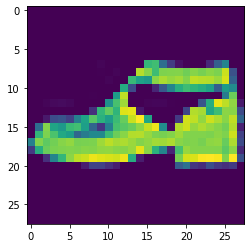

In [45]:
plt.imshow(test_data[second_image])

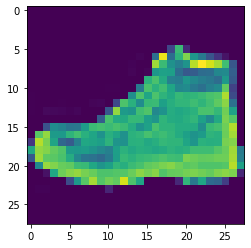

In [46]:
plt.imshow(test_data[last_image])

In [38]:
###t = activation_model.predict(test_data[first_image].reshape(1, 28, 28, 1))
print(len(t))
print(t[0].shape)
print(t[1].shape)


7
(1, 26, 26, 64)
(1, 13, 13, 64)
(1, 13, 13, 64)
